In [1]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

输入数据为 $3*1$ 矩阵形式

logistic回归为分类模型，y 分为 0，1 两类

In [2]:
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[0.0], [0.0], [1.0]])

In [3]:
class LogisticRegressionModel(torch.nn.Module):
  def __init__(self): # 初始化模型
    super(LogisticRegressionModel, self).__init__() # 继承父类torch.nn.Module的初始化项
    self.linear = torch.nn.Linear(1, 1) # 初始化父类torch.nn.Linear(a, b) a表示数据输入维度，b表示输出维度
    self.sigmoid = torch.nn.Sigmoid() # 初始化激活函数sigmoid
  def forward(self, x):
    y_pred = self.sigmoid(self.linear(x)) # logistic回归就是将linear回归得到的y_pred套上一层sigmoid函数使其落在[0,1]的区间上
    return y_pred

model = LogisticRegressionModel() # 实例化模型

In [5]:
criterion = torch.nn.BCELoss(size_average=False) # 定义损失函数，回归问题一般用均方误差MSE，分类问题一般用交叉熵CELoss，二分类问题用BCELoss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # 定义优化器，model.parameters()会扫描module中的所有成员，如果成员中有相应权重，那么都会将结果加到要训练的参数集合上

epoch_list = []
loss_list = []

/usr/local/lib/python3.9/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [6]:
for epoch in range(100):
  # 1.前向传播计算损失
  y_pred = model(x_data)
  loss = criterion(y_pred, y_data)

  epoch_list.append(epoch)
  loss_list.append(loss.item())
  # 梯度清零
  optimizer.zero_grad()
  # 2.反向传播
  loss.backward()
  # 3.更新参数
  optimizer.step()
  if epoch % 10 == 0:
    print('epoch=', epoch, 'w=', model.linear.weight.item(), 'b=', model.linear.bias.item())

x_test = torch.tensor([4.0])
y_test = model(x_test)

print("y_pred=", y_test)

epoch= 0 w= 0.5161425471305847 b= 0.8603742122650146
epoch= 10 w= 0.30714645981788635 b= 0.7115687727928162
epoch= 20 w= 0.14825628697872162 b= 0.5863597393035889
epoch= 30 w= 0.03964047506451607 b= 0.4841214716434479
epoch= 40 w= -0.028058333322405815 b= 0.4004144072532654
epoch= 50 w= -0.0664329081773758 b= 0.3300652503967285
epoch= 60 w= -0.08503486961126328 b= 0.2688729763031006
epoch= 70 w= -0.09063666313886642 b= 0.21386586129665375
epoch= 80 w= -0.08777784556150436 b= 0.16304929554462433
epoch= 90 w= -0.07944322377443314 b= 0.11510863900184631
y_pred= tensor([0.4497], grad_fn=<SigmoidBackward0>)


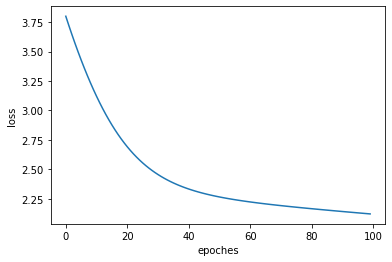

In [7]:
plt.plot(epoch_list, loss_list)
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()